# <font color=red>Tutorial 7 - Hypotheses testing</font>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Monty cheating?

As we already saw, in the (3-door) Monty Hall Game, there's a 2/3 probability that a switch will result in a car. 

However, this probability holds only under the assumptions of the assumed model. One of these assumptions, for example, is that after the contestant chooses whether or not to switch his or her selection to the unopen door, nobody in the production side intervenes with whatever is behind the chosen door. 

Let's say you suspect Monty and the production company are cheating and that in fact the probability of winning the car after switching is lower than 2/3.

### 1. Clearly state the two hypotheses.

Denote by $p$ The probability of winning the car after switching is 2/3
$$ H_0: p = \frac{2}{3}\\
H_1: p < \frac{2}{3}
$$

You collect data on 84 shows in which a contestant decided to switch to the unopened door and write down what was behind the door to which the contestant switched in each such show. True records show that in 45 of the 84 shows, there was a car behind that door, and in the rest of the shows there was a goat.

### 2. What is the test statistic?


A test statistic measures the degree of agreement between a sample of data and the null hypothesis. It contains information about the data that is relevant for deciding whether to reject the null hypothesis - in our case it's the winning probability of 45/84.

### 3. Run a simulation and plot the parameter estimation under the null hypothesis. Also mark the test statistic.

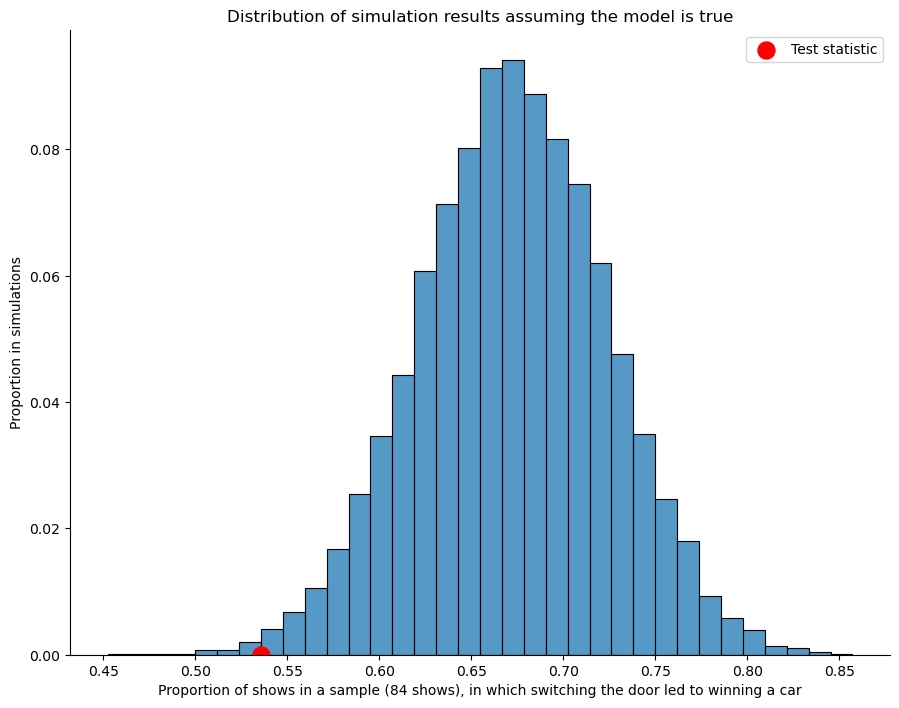

In [2]:
behind_door = ['car', 'goat'] # possible items behind door to which the contestant switches
prob_for_item = [2/3, 1/3] # probabilities GIVEN THE MODEL IS TRUE
sample_size = 84 # number of shows sampled
number_of_wins_from_real_data = 45 # Number of wins observed in 84 shows

# simulate one value
def prob_win_car():
    sample_shows = np.random.choice(behind_door, p=prob_for_item, size=sample_size)
    num_cars = np.count_nonzero(sample_shows == 'car')
    return num_cars/sample_size

# run multiple simulations
num_repetitions = 20000
many_prob_win_car = np.array([prob_win_car() for i in range(num_repetitions)])

# Not one liner:
# many_prob_win_car = np.empty(num_repetitions) # collection array
# for i in range(num_repetitions):
#     many_prob_win_car[i] = prob_win_car()

# plot the empirical distribution of the statistic
facetgrid_obj = sns.displot(many_prob_win_car, bins=np.unique(many_prob_win_car), stat='probability') # Defining the bins
facetgrid_obj.fig.set_size_inches(10, 7)
facetgrid_obj.set(title='Distribution of simulation results assuming the model is true', xlabel=f'Proportion of shows in a sample (84 shows), in which switching the door led to winning a car', ylabel='Proportion in simulations')

# Add a red point on the plot marking our data
prob_win_in_data = 45/84
facetgrid_obj.axes[0, 0].scatter(prob_win_in_data, 0, s=150, color='red')  # draw observed value
facetgrid_obj.axes[0, 0].legend(['Test statistic'])

### 4. What is the *p*-value of your test?

*p*-value is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct.

In [3]:
num_simulations_like_data_or_more_extreme = np.count_nonzero(many_prob_win_car <= prob_win_in_data) 
print (f'The p-value is {num_simulations_like_data_or_more_extreme/num_repetitions}')

The p-value is 0.00795


### 5. What is your conclusion?

We got $p_{value}<0.05$, which means that the observed case (the red point: 45/84) is part of the 5% tail of the empirical distribution. Therefore, assuming significance level of 0.05, we will reject the null hypothesis. That is, we can reject the hypothesis that the probability of winning the car after a switch is 2/3. It may be true that Monty is cheating according the results we got (but it can happen from other reasons too).

## <font color=blue> **Exercise** </font>
## Contestants biased?

Let's now say that after watching many shows to collect your data, you start to notice that on average, on their first pick, contestants do not seem to choose randomly between the three doors (they seem to choose the middle door less). Specifically, in the 84 shows you recorded, contestants chose the left door (door A) 32 times, the middle door (door B) 22 times, and the left door (door C) 30 times. So you have decided to investigate if it is indeed a random pick based on the second door. 


### 1. Clearly state the two hypotheses

Denote by $p_B$ The probability of choosing the second door (door B).
$$
H_0: p_B = \frac{1}{3} \\
H_1: p_B < \frac{1}{3}
$$

### 2. What is your test statistic? 


The probability of choosing the second door (door B) on the given sample - 22/84

### 3. Run a simulation and plot the empirical distribution of this statistic, and mark the outcome of the statistic in your data on the plot

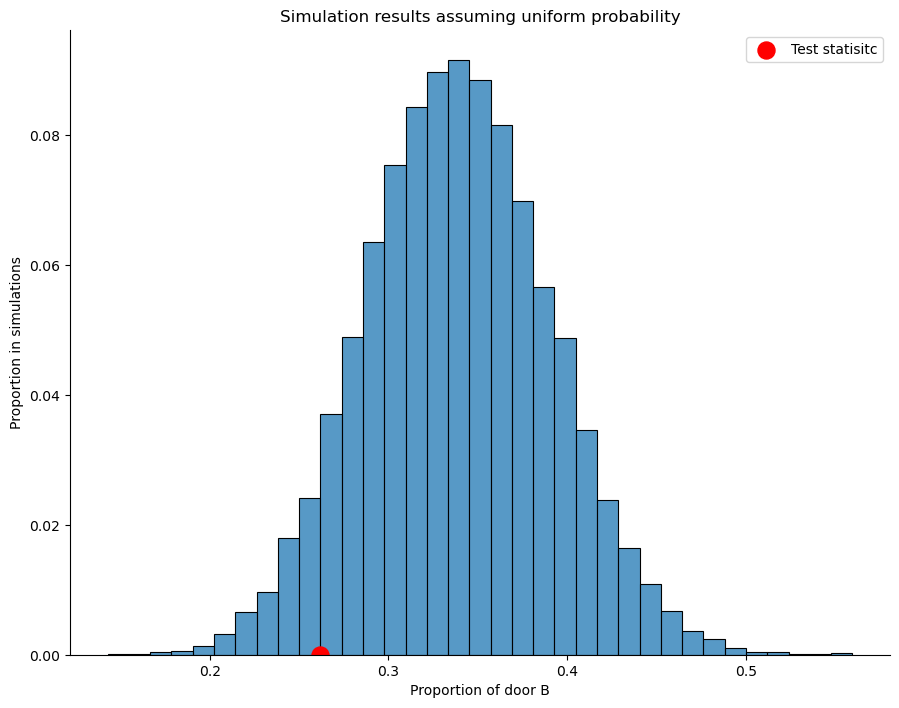

In [4]:
doors = ['B','other']
doors_probability = [1/3, 2/3] # distribution under the null hypothesis
sample_size = 84
doorB_proportion_from_data = 22/sample_size # proportion in data

# function for simulating one value of the statistic under the null hypothesis
def one_doors_sample():
    # draw a simple random sample under the null hypothesis
    doors_sample = np.random.choice(doors, p=doors_probability, size=sample_size)
    # calculate how many times door B was chosen
    count_door_B = np.count_nonzero(doors_sample == 'B')
    # return the proportion of door B in the random sample
    return count_door_B / sample_size

# running multiple simulations
num_repetitions = 20000
simulation_results = np.empty(num_repetitions)
for i in range(num_repetitions):
    simulation_results[i] = one_doors_sample()

# visualizing the results
# plot the empirical distribution of the statistic
facetgrid_obj = sns.displot(simulation_results, bins=np.unique(simulation_results), stat='probability')
facetgrid_obj.fig.set_size_inches(10, 7)
facetgrid_obj.set(title='Simulation results assuming uniform probability', xlabel='Proportion of door B', ylabel='Proportion in simulations')
# Add a red point on the plot marking our data
facetgrid_obj.axes[0, 0].scatter(doorB_proportion_from_data, 0, s=150, color='red')  # draw observed value
facetgrid_obj.axes[0, 0].legend(['Test statisitc'])

### 4. What is the *p*-value? Calculate it using code and the results question 3. 

In [5]:
p_value = np.count_nonzero(simulation_results <= doorB_proportion_from_data) / num_repetitions
print(f'The p-value is: {p_value}')

The p-value is: 0.1012


### 5. What is your conclusion? On what significance level can we reject the null hypothesis?

We got p>0.05, so we cannot reject the null hypothesis with significance level of 0.05. That is, our observed case (the red point) falls within the majority of the distribution (95%), therefore we cannot reject the null hypothesis.